In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

**Column Descriptions:**

Administrative: This is the number of pages of this type (administrative) that the user visited.

Administrative_Duration: This is the amount of time spent in this category of pages.

Informational: This is the number of pages of this type (informational) that the user visited.

Informational_Duration: This is the amount of time spent in this category of pages.

ProductRelated: This is the number of pages of this type (product related) that the user visited.

ProductRelated_Duration: This is the amount of time spent in this category of pages.

BounceRates: The percentage of visitors who enter the website through that page and exit without triggering any additional tasks.

ExitRates: The percentage of pageviews on the website that end at that specific page.

PageValues: The average value of the page averaged over the value of the target page and/or the completion of an eCommerce transaction.

SpecialDay: This value represents the closeness of the browsing date to special days or holidays (eg Mother's Day or Valentine's day) in which the transaction is more likely to be finalized. 

Month: Contains the month the pageview occurred, in string form.

OperatingSystems: An integer value representing the operating system that the user was on when viewing the page.

Browser: An integer value representing the browser that the user was using to view the page.

Region: An integer value representing which region the user is located in.

TrafficType: An integer value representing what type of traffic the user is categorized into.

VisitorType: A string representing whether a visitor is New Visitor, Returning Visitor, or Other.

Weekend: A boolean representing whether the session is on a weekend.

Revenue: A boolean representing whether or not the user completed the purchase

In [2]:
data=pd.read_csv('online_shoppers_intention.csv')
data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [3]:
def plot_hist(variable):
    plt.figure(figsize =(9,3))
    plt.hist(data[variable], bins =30)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

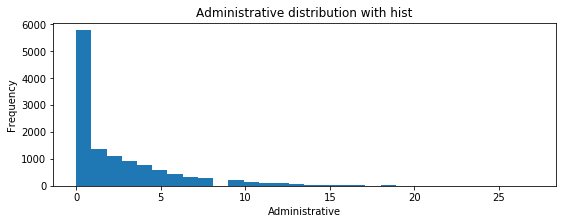

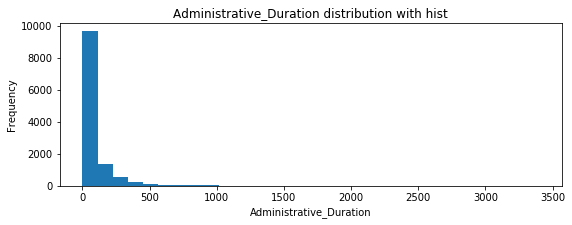

In [4]:
numericVar = ["Administrative", "Administrative_Duration"]
for n in numericVar:
    plot_hist(n)

    

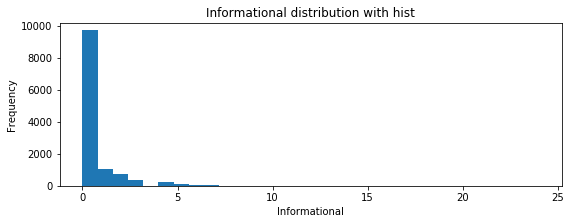

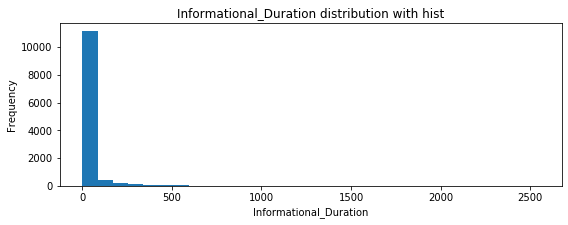

In [5]:
numericVar = ["Informational", "Informational_Duration"]
for n in numericVar:
    plot_hist(n)   

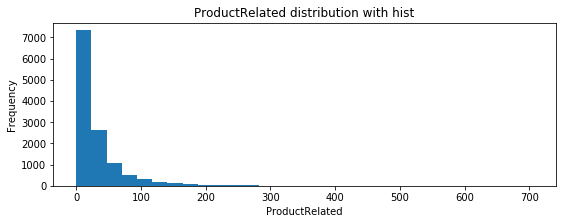

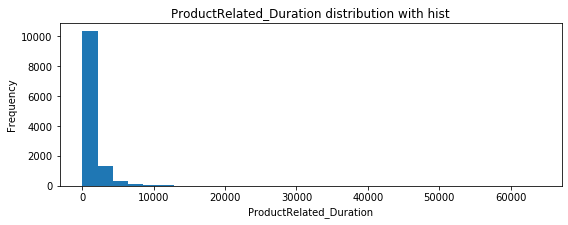

In [6]:
numericVar = ["ProductRelated", "ProductRelated_Duration"]
for n in numericVar:
    plot_hist(n)

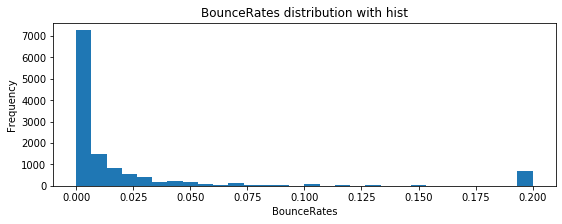

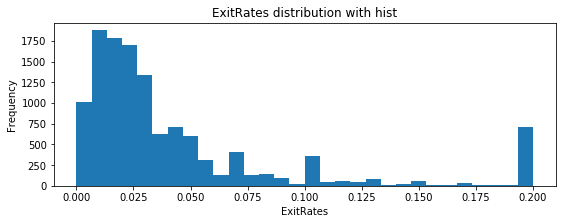

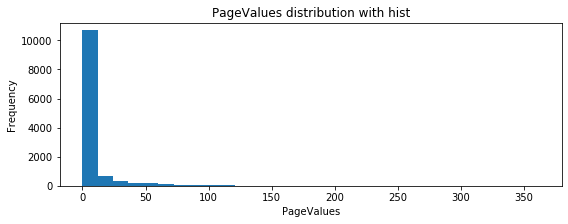

In [7]:
numericVar = ["BounceRates", "ExitRates","PageValues"]
for n in numericVar:
    plot_hist(n)

In [8]:
def bar_plot(variable):
    #get feature
    var = data[variable]
    #count number of categorical variable(value/sample)
    varValue = var.value_counts()
   
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, varValue))

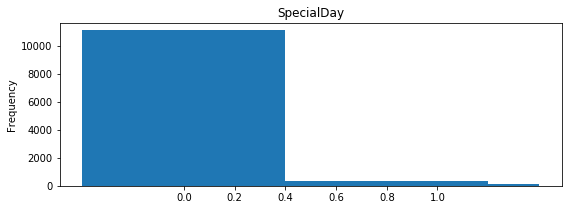

SpecialDay: 
 0.0    11079
0.6      351
0.8      325
0.4      243
0.2      178
1.0      154
Name: SpecialDay, dtype: int64


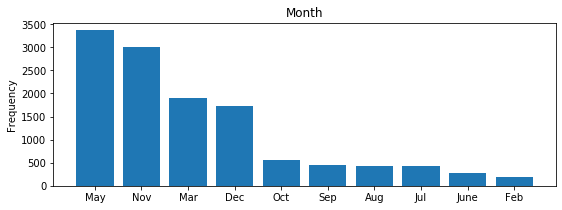

Month: 
 May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64


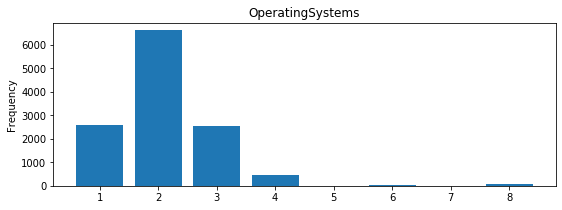

OperatingSystems: 
 2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64


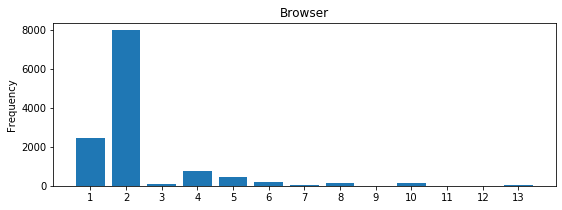

Browser: 
 2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       49
12      10
11       6
9        1
Name: Browser, dtype: int64


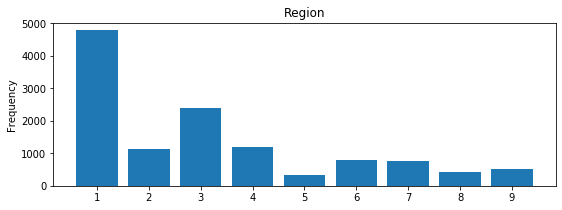

Region: 
 1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64


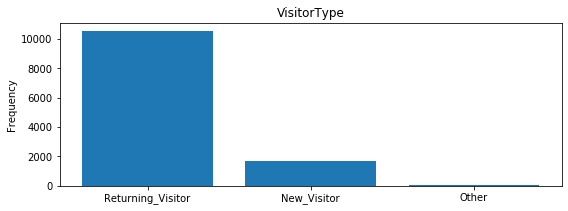

VisitorType: 
 Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64


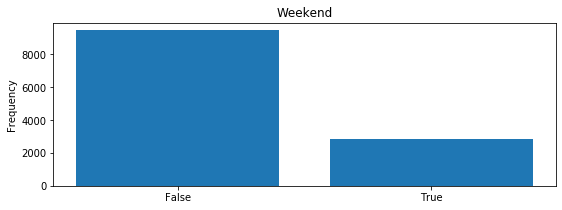

Weekend: 
 False    9462
True     2868
Name: Weekend, dtype: int64


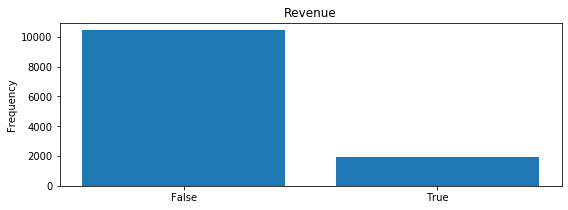

Revenue: 
 False    10422
True      1908
Name: Revenue, dtype: int64


In [9]:
category1 = ["SpecialDay","Month","OperatingSystems","Browser","Region","VisitorType","Weekend","Revenue"]
for c in category1:
    bar_plot(c)

#### To check what factors affect Revenue

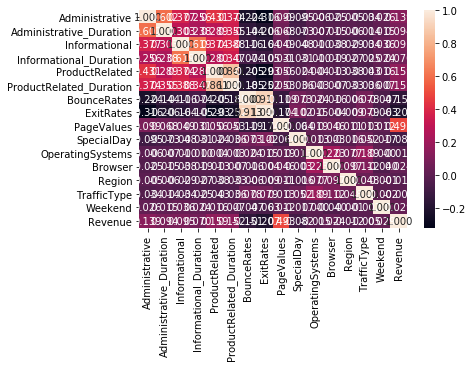

In [10]:
sns.heatmap(data.corr(), annot=True, fmt =".3f")
plt.show()

In [11]:
data.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [12]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

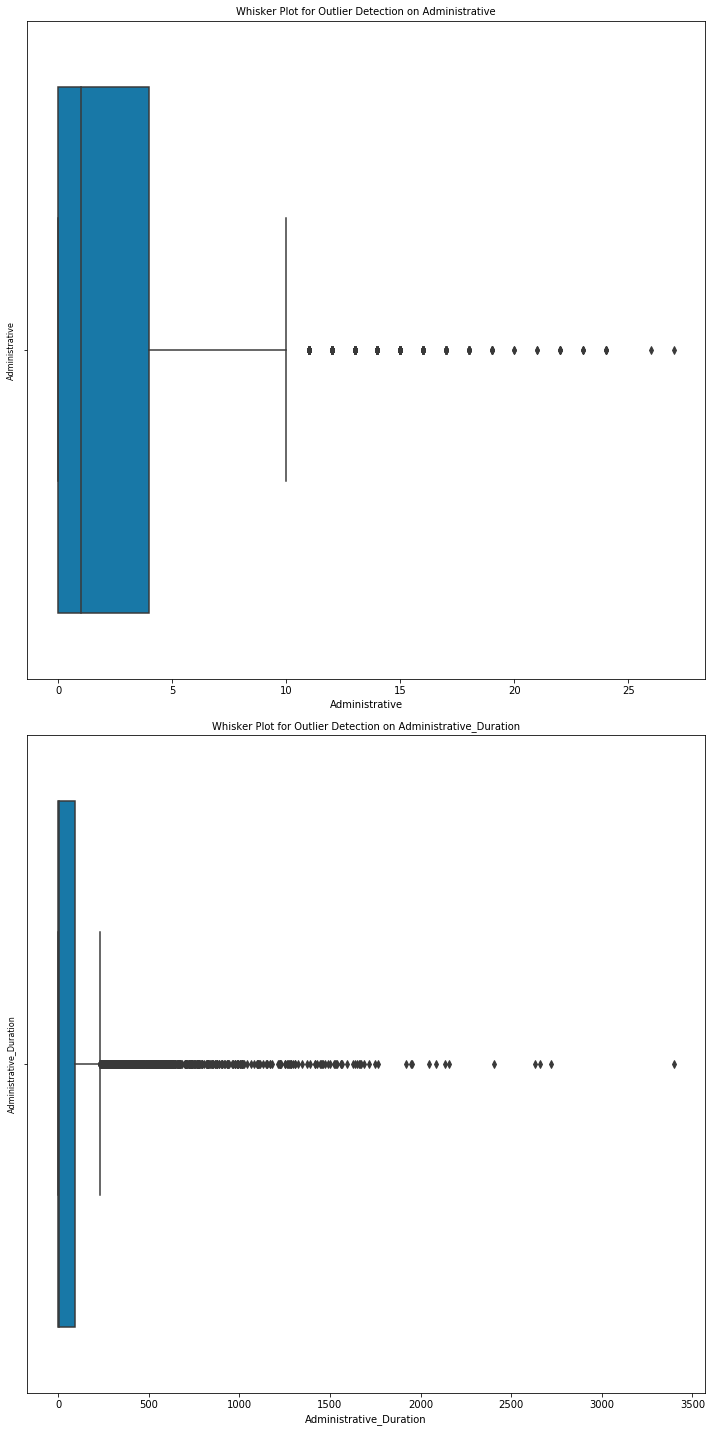

In [13]:
Column_List = ['Administrative', 'Administrative_Duration']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

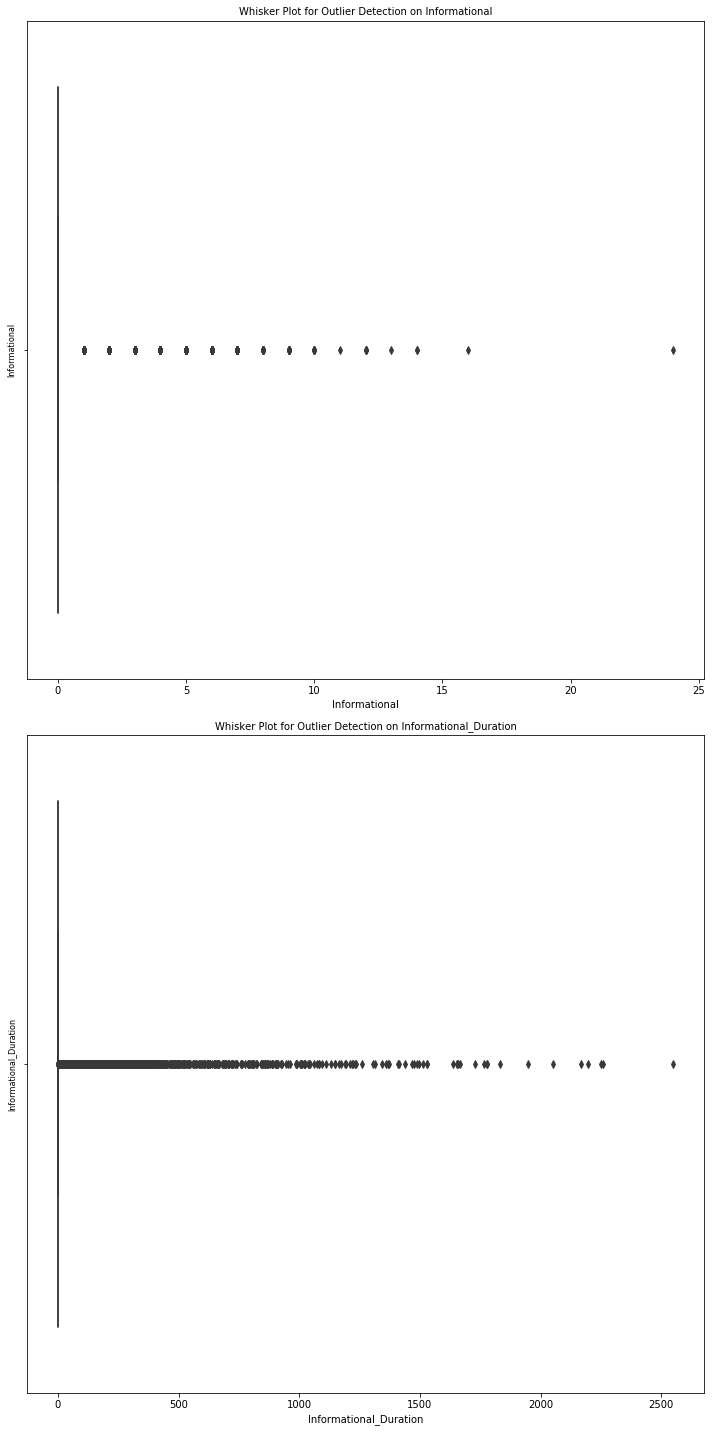

In [14]:
Column_List = ['Informational', 'Informational_Duration']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(data[col_list], ax = ax[i], palette = "winter", orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list, fontsize = 10)
    ax[i].set_ylabel(col_list, fontsize = 8)
    fig.tight_layout(pad = 1.1)

###  Data Modelling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [15]:
data = data.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [18]:
visitor_encoded = pd.get_dummies(data['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([data, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [30]:
X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1, test_size=.3)

In [31]:
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# Make prediction using our test data and model
y_pred = gnb.predict(X_test) 
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))

Gaussian Naive Bayes model accuracy(in %): 85.4


In [43]:
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 89.89


In [33]:
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 89.35


The area under the ROC curve is: 0.9


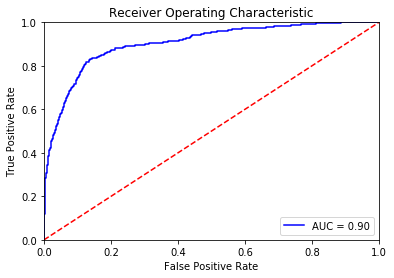

In [35]:
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [36]:
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.16


In [37]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [38]:
gnb_stratified = GaussianNB() 
gnb_stratified.fit(X_train_stratified, y_train_stratified) 

# Make prediction using our test data and model
y_pred_stratified = gnb_stratified.predict(X_test_stratified) 

# Comparing our prediction to response values
print("Stratified Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test_stratified, y_pred_stratified)*100,2))

Stratified Gaussian Naive Bayes model accuracy(in %): 83.78


In [39]:
# Fit Random Forest Classifier to our Training Data
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

Stratified Random Forest Classifier model accuracy(in %): 89.5


The area under the ROC curve for unbalanced data is: 0.9
The area under the ROC curve for stratified data is: 0.9


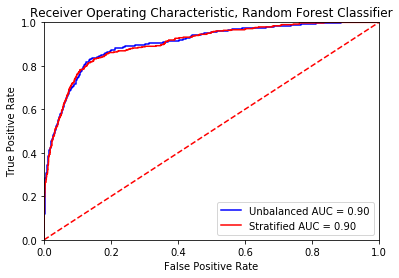

In [44]:
oc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_rfc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_rfc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [45]:
importances = rfc_stratified.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_stratified.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]


In [46]:
col_names = pd.Series([col for col in X_train_stratified.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)

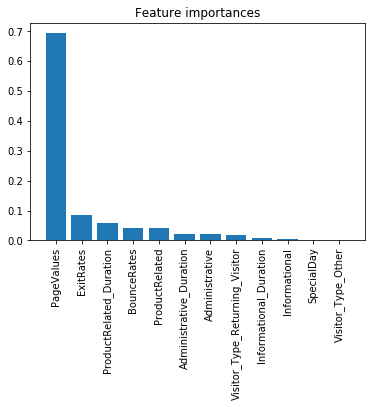

In [47]:
plt.title("Feature importances")
plt.bar(range(X_train_stratified.shape[1]),importances[indices])
plt.xticks(range(X_train_stratified.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train_stratified.shape[1]])
plt.show()

In [49]:
data=pd.read_csv('online_shoppers_intention.csv')
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [50]:
data = data.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend','SpecialDay'], axis=1)

In [51]:
visitor_encoded = pd.get_dummies(data['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([data, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [66]:
X = shopping_clean_merged.drop('Revenue', axis=1)
y = shopping_clean_merged['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.1)

In [67]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 

# Make prediction using our test data and model
y_pred = gnb.predict(X_test) 

# Comparing our prediction to response values
print("Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test, y_pred)*100,2))

Gaussian Naive Bayes model accuracy(in %): 85.89


In [68]:
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 91.97


In [71]:
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 90.92


The area under the ROC curve is: 0.9


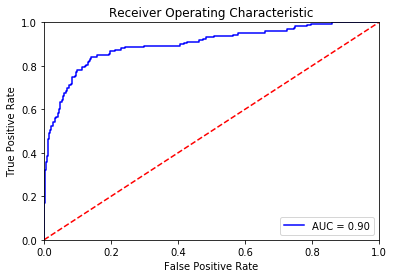

In [72]:
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [73]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.16


In [74]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [75]:
gnb_stratified = GaussianNB() 
gnb_stratified.fit(X_train_stratified, y_train_stratified) 

# Make prediction using our test data and model
y_pred_stratified = gnb_stratified.predict(X_test_stratified) 

# Comparing our prediction to response values
print("Stratified Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test_stratified, y_pred_stratified)*100,2))

Stratified Gaussian Naive Bayes model accuracy(in %): 84.18


In [76]:
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

Stratified Random Forest Classifier model accuracy(in %): 89.42


The area under the ROC curve for unbalanced data is: 0.9
The area under the ROC curve for stratified data is: 0.9


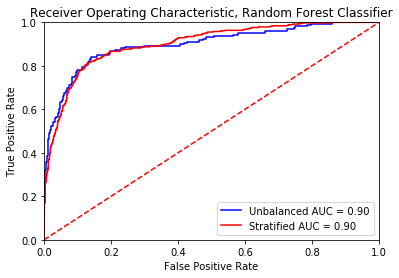

In [77]:

roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_rfc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_rfc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()